In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

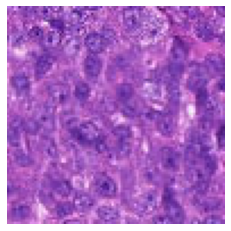

In [2]:
# Load the image
img = mpimg.imread("../Data/train_labels/example.tif")

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
import os
import pandas as pd
from PIL import Image
from glob import glob

# Set the path to the directory containing the tif images
img_dir = '../Data/train'

# Set the path to the CSV file containing the id-label mapping
id_file = "../Data/train_labels/train_labels.csv"



,label
id,
f38a6374c348f90b587e046aac6079959adf3835,0
c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
755db6279dae599ebb4d39a9123cce439965282d,0
bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
068aba587a4950175d04c680d38943fd488d6a9d,0
...,...
53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
d4b854fe38b07fe2831ad73892b3cec877689576,1
3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0


In [4]:
id_df.loc['00001b2b5609af42ab0ab276dd4cd41c3e7745b5',"label"]

1

In [5]:
img_dir = '../Data/train'

In [6]:
import os
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to the directory containing the TIFF images
img_dir = '../Data/train'

# Load the first image to get the image size
sample_img = load_img(os.path.join(img_dir, os.listdir(img_dir)[0]))
img_width, img_height = sample_img.size
channels = 3

# Define the input shape of the autoencoder
input_img = Input(shape=(img_width, img_height, channels))

# Define the encoder layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# Save the encoder output for later use
encoder_output = x

# Define the decoder layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)
# Compile the model with MSE loss function
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# I set the loss function is  to 'binary_crossentropy', VERY bad idea


In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856 

In [8]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
early_stop = EarlyStopping(monitor='loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.001,verbose=False)

In [9]:
maxC = 25000

In [10]:



# Load the first 100 RGB TIFF images and convert them to arrays
X_train = []
for i, img_path in enumerate(os.listdir(img_dir)):
    if i >= maxC:
        break
    img = load_img(os.path.join(img_dir, img_path), target_size=(img_width, img_height))
    img_array = img_to_array(img)
    X_train.append(img_array)

X_train = np.array(X_train)


# Normalize the input data
X_train = X_train / 255.

In [ ]:


# Train the autoencoder on the input data
autoencoder.fit(X_train, X_train, epochs=30, batch_size=100)


Epoch 1/30
250/250 [==============================] - 36s 123ms/step - loss: 0.0338
Epoch 2/30
250/250 [==============================] - 30s 121ms/step - loss: 0.0241
Epoch 3/30
250/250 [==============================] - 31s 123ms/step - loss: 0.0216
Epoch 4/30
250/250 [==============================] - 31s 126ms/step - loss: 0.0201
Epoch 5/30
250/250 [==============================] - 31s 125ms/step - loss: 0.0187
Epoch 6/30
250/250 [==============================] - 31s 124ms/step - loss: 0.0173
Epoch 7/30
250/250 [==============================] - 32s 128ms/step - loss: 0.0162
Epoch 8/30
250/250 [==============================] - 32s 128ms/step - loss: 0.0156
Epoch 9/30
250/250 [==============================] - 30s 121ms/step - loss: 0.0149
Epoch 10/30
250/250 [==============================] - 30s 121ms/step - loss: 0.0146
Epoch 11/30
250/250 [==============================] - 30s 121ms/step - loss: 0.0140
Epoch 12/30
250/250 [==============================] - 30s 122ms/step - lo

In [ ]:

# Load the first 100 RGB TIFF images and convert them to arrays
X_test = []
for i, img_path in enumerate(os.listdir(img_dir)):
    if i >= maxC:
        img = load_img(os.path.join(img_dir, img_path), target_size=(img_width, img_height))
        img_array = img_to_array(img)
        X_test.append(img_array)
#         if(i == maxC+1):
#             break
        break;


In [ ]:
X_test = np.array(X_test)


# Normalize the input data
X_testB = X_test / 255.


predictions = autoencoder.predict(X_testB)



In [ ]:
X_testB[0][0][0]*255

In [ ]:
predictions[0][0][0]*255

In [ ]:
X_testB

In [ ]:
predictions

In [ ]:
encoder_output

In [ ]:
encoder_model = Model(input_img, encoder_output)

In [ ]:
encoder_model.predict(X_testB).shape

In [ ]:
12*12*32

In [ ]:
92*92*3

In [ ]:
4608/25392

In [ ]:
autoencoder.save("autoencoderV3B.h5") #

In [ ]:
encoder_model.save("encoder_modelV3B.h5")